In [1]:
# case fatality rate

In [1]:
import argparse
import os
import pickle
import pprint
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os
from utils import *

DATA_DIR = "../florida/data/"
time = 'Case_'
#print(time)
florida= pd.read_csv(os.path.join(
        DATA_DIR, 'florida_2020-12-04-15-35-01.csv'),index_col=False, parse_dates=[time, "ChartDate"])
florida["Age_group"] = florida["Age_group"].astype('category')
print(florida['Hospitalized'].value_counts())
print(florida['Hospitalized'].unique()) # 'YES'=1, else = 0
print(florida['Died'].unique()) # 'Yes'=1, nan = 0


NO         547028
UNKNOWN    424072
YES         56809
Name: Hospitalized, dtype: int64
['UNKNOWN' 'NO' 'YES' nan]
[nan 'Yes']


In [2]:

florida['Case'].value_counts()
florida['Died'].fillna(0, inplace=True)
florida.loc[florida['Died']=='Yes', 'Died'] =1 

florida.loc[florida['Hospitalized']!='YES', 'Hospitalized'] = 0
florida.loc[florida['Hospitalized']=='YES', 'Hospitalized'] = 1
#timeh = 'ChartDate' # hospitalized time
florida.sort_values(by=time, inplace=True)
florida[time] = florida[time].dt.date
florida[time] = florida[time].astype('datetime64[ns]')

# florida.loc
order_cat = ['0-4 years',
                                             '5-14 years',
                                             '15-24 years',
                                             '25-34 years',
                                             '35-44 years',
                                             '45-54 years',
                                             '55-64 years',
                                             '65-74 years',
                                             '75-84 years',
                                             '85+ years',
                                             'Unknown']#[::-1]
florida['Age_group'].cat.reorder_categories(order_cat, inplace=True)
florida['Age_group'].cat.rename_categories({'Unknown':'_'+'Unknown'}, inplace=True)
florida['Age_group'].cat.rename_categories({'0-4 years':'0-4',
                                             '5-14 years': '5-14',
                                             '15-24 years':'15-24',
                                             '25-34 years': '25-34',
                                             '35-44 years':'35-44',
                                             '45-54 years':'45-54',
                                             '55-64 years':'55-64',
                                             '65-74 years':'65-74',
                                             '75-84 years':'75-84',
                                             '85+ years':'85+'}, inplace=True)

florida['Age_group'].cat.categories
#max_date = florida[time].max()
#min_date = florida[time].min()
#print('max date:', max_date, "min date", min_date)

min_date = pd.Timestamp('2020-04-01')
max_date = pd.Timestamp('2020-11-1')

florida.rename(columns={'Age_group':'Old_age_group'}, inplace=True)
florida.columns
florida['Age_group'] = florida['Age'].apply(lambda x: '0-9' if x < 10 
                                                           else ('10-19' if x < 20 
                                                                else('20-29'if x < 30 
                                                                    else('30-39' if x <40
                                                                        else('40-49' if x < 50
                                                                            else('50-59' if x < 60
                                                                                 else '60-69' if x<70
                                                                                    else '70-79' if x<80
                                                                                        else '80+' if not pd.isnull(x) 
                                                                                             else '_Unknown'))))))

florida['Age_group'] = florida['Age_group'].astype('category')
florida['Age_group'].cat.categories
order_cat = ['0-9',
                                             '10-19',
                                             '20-29',
                                             '30-39',
                                             '40-49',
                                             '50-59',
                                             '60-69',
                                             '70-79',
                                             '80+',
                                             '_Unknown']#[::-1]
florida['Age_group'].cat.reorder_categories(order_cat, inplace=True)

florida['Age_group'].cat.categories


Index(['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79',
       '80+', '_Unknown'],
      dtype='object')

In [4]:
plt.rcParams['figure.figsize'] = [5.5, 4]
SMALL_SIZE = 10.5
MEDIUM_SIZE = 11
MEDIUM_Plus= 11.5
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_Plus)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


# all cases: died, hosp, covid


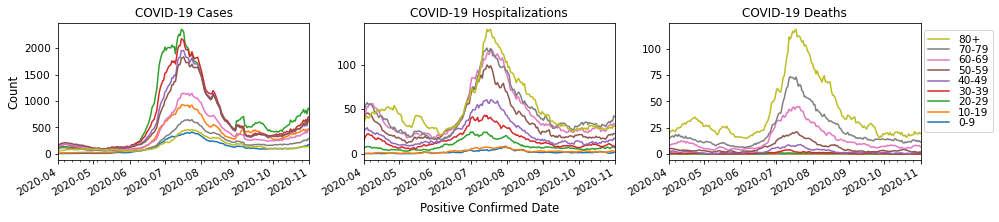

In [9]:
from matplotlib import dates

plt.rcParams['figure.figsize'] = [13, 3.2]

florida['all'] = 1
vrs = ['all', 'Hospitalized', 'Died'] # 'Died'
lbs = ['COVID-19 Cases','COVID-19 Hospitalizations', 'COVID-19 Deaths']
grpvar='Age_group'
freq='7D'
time=time
newdf = florida

fig, ax = plt.subplots(1,3)
for i, v in enumerate(vrs):
    amt=v
    df = get_groupby_rolling_df(newdf, grpvar, freq, amt, time)
    ylb = 'Count' if i==0 else ''
    xlb = 'Positive Confirmed Date' if i==1 else ''
    df = df[df[grpvar]!='_Unknown']
    df[grpvar].cat.remove_unused_categories(inplace=True)

    p = df.groupby(grpvar)['rolling sum'].plot(ylabel=ylb, xlabel=xlb, ax=ax[i])
    
    #ax[i] = 
    graph_leg(p, '{}'.format(lbs[i]))
   # axes[0] = p[0]
handles, labels = ax[2].get_legend_handles_labels()
#fig.legend(reversed(handles), reversed(labels),labelspacing=0.04 ,bbox_to_anchor = (1.065,0.85), borderaxespad=0.)
for i in range(3):
    date_fmt = '20%y-%m'
    formatter = dates.DateFormatter(date_fmt)
    ax[i].xaxis.set_major_locator(mdates.MonthLocator())
    ax[i].xaxis.set_major_formatter(formatter)
    plt.gcf().autofmt_xdate()
plt.tight_layout()
fig.legend(reversed(handles), reversed(labels),labelspacing=0.04 ,bbox_to_anchor = (1.065,0.85), borderaxespad=0.)
fig.savefig('img/{}'.format('cases.svg'), bbox_inches='tight')

    


DatetimeIndex(['2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11',
               ...
               '2020-11-24', '2020-11-25', '2020-11-26', '2020-11-27',
               '2020-11-28', '2020-11-29', '2020-11-30', '2020-12-01',
               '2020-12-02', '2020-12-03'],
              dtype='datetime64[ns]', name='Case_', length=277, freq=None)
DatetimeIndex(['2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11',
               ...
               '2020-11-24', '2020-11-25', '2020-11-26', '2020-11-27',
               '2020-11-28', '2020-11-29', '2020-11-30', '2020-12-01',
               '2020-12-02', '2020-12-03'],
              dtype='datetime64[ns]', name='Case_', length=277, freq=None)
DatetimeIndex(['2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',

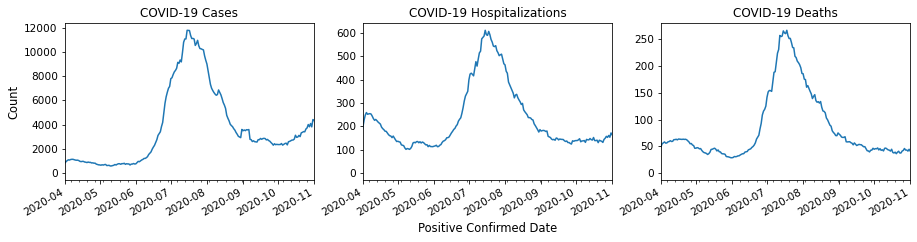

In [22]:
plt.rcParams['figure.figsize'] = [13, 3.2]

florida['all'] = 1
vrs = ['all',  'Hospitalized','Died'] # 'Died'
lbs = ['COVID-19 Cases', 'COVID-19 Hospitalizations','COVID-19 Deaths']
grpvar='Age_group'
freq='7D'
time=time
newdf = florida

fig, ax = plt.subplots(1,3)
for i, v in enumerate(vrs):
    amt=v
    df = get_rolling_df(newdf, time, freq=7, var=amt)
    print(df.index)
    ylb = 'Count' if i==0 else ''
    xlb = 'Positive Confirmed Date' if i==1 else ''
    p = df[amt].plot(ylabel=ylb, xlabel=xlb, ax=ax[i], legend=False)
    graph_leg_acc(p, '{}'.format(lbs[i]))
plt.tight_layout()

for i in range(3):
    date_fmt = '20%y-%m'
    formatter = dates.DateFormatter(date_fmt)
    ax[i].xaxis.set_major_locator(mdates.MonthLocator())
    ax[i].xaxis.set_major_formatter(formatter)
    plt.gcf().autofmt_xdate()
fig.savefig('img/{}'.format('cases_acc.svg'), bbox_inches='tight')


In [10]:

def get_peak(t1="2020-04-01",t2="2020-05-01", amt="Covid"):
    df1 = df[(df.index>=t1) & (df.index<=t2)]
    print(amt, ',', df1[df1[amt]==df1[amt].max()][amt].item())
    

for i, v in enumerate(vrs):
    df = get_rolling_df(newdf, time, freq=7, var=v)
    #print('first peak')
    get_peak(t1="2020-04-01",t2="2020-05-01", amt=v)
    #print('second peak')
    get_peak(t1="2020-07-01",t2="2020-08-01", amt=v)

all , 1130.4285714285713
all , 11781.714285714286
Hospitalized , 258.85714285714283
Hospitalized , 610.7142857142857
Died , 63.57142857142857
Died , 267.0


In [11]:
times = ['2020-4-15', '2020-7-15', '2020-4-1', '2020-11-5', '2020-11-10']
newdf = florida

#for t in times:
florida[florida[time].isin(times)].groupby(time)['Age'].median()
#df = get_rolling_df(newdf, time, freq=7, var=v)
#df[df.index.isin(times)]

Case_
2020-04-01    51.0
2020-04-15    52.0
2020-07-15    40.0
2020-11-05    37.0
2020-11-10    40.0
Name: Age, dtype: float64

# Collect CFR, HFR, CFR

In [13]:
def graph_leg_acc(p, name):
    min_date = "2020-04-01"
    max_date = "2020-11-01"
    grey = False
    p.set_xlim(pd.Timestamp(min_date), pd.Timestamp(max_date))
    grey = False
    if grey:
        if name!='COVID-19 Cases':
            p.axvspan(pd.Timestamp(max_date)-pd.Timedelta(days=30), pd.Timestamp(max_date), color='grey', alpha=0.5, lw=0)
        else: 
            p.axvspan(pd.Timestamp(max_date)-pd.Timedelta(days=14), pd.Timestamp(max_date), color='grey', alpha=0.5, lw=0)

    p.set_title(name)

/home/cheng/anaconda3/envs/py38/lib/python3.8/site-packages/pandas/core/frame.py:4314: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


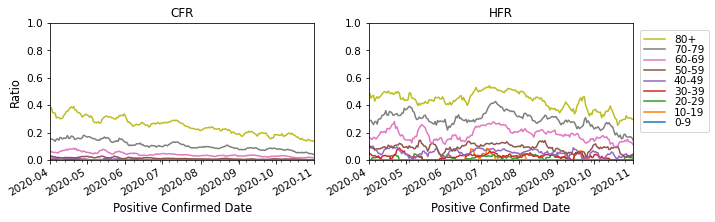

In [21]:
fig, ax = plt.subplots(1,2)
plt.rcParams['figure.figsize'] = [9, 3.2]

grpvar='Age_group'
freq='7D'
amt="Died"
time=time
newdf = florida[florida['Hospitalized'] ==1].copy()

df = get_groupby_rolling_df(newdf, grpvar, freq, amt, time)
df1 = df.copy()
df1['Died'] = df1['rolling sum']
df= get_groupby_rolling_df(newdf, grpvar, freq, 'Hospitalized', time)
df2 = df
df2['Hospitalized'] = df2['rolling sum']
df3 = df1
df3['Hospitalized'] = df2['Hospitalized']
df3['HFR'] = df3['Died'] / df3['Hospitalized']

df3['HFR'].fillna(0, inplace=True)
df3 = df3[df3[grpvar]!='_Unknown']
df3[grpvar].cat.remove_unused_categories(inplace=True)

p = df3.groupby(grpvar)['HFR'].plot(legend=False, ax=ax[1])
p[0].set_xlabel("")
graph_leg(p, 'HFR')
####merge
newdf = florida
newdf['all'] = 1
# all died
df = get_groupby_rolling_df(newdf, grpvar, freq, 'Died', time)
df1 = df.copy()
df1['Died'] = df1['rolling sum']
# all hosp
df = get_groupby_rolling_df(newdf, grpvar, freq, 'Hospitalized', time)
df2 = df.copy()
df2['Hospitalized'] = df2['rolling sum']
#all
df = get_groupby_rolling_df(newdf, grpvar, freq, 'all', time)
df['all'] = df['rolling sum']
df = df[[grpvar, 'all']].merge(df1[[grpvar, 'Died']], on=[time, grpvar], how='outer')
df = df[[grpvar, 'all', 'Died']].merge(df2[[grpvar, 'Hospitalized']], on=[time, grpvar], how='outer')
df[['Died', 'Hospitalized']].fillna(0, inplace=True)


##########CFR
df['CFR'] = df['Died']/df['all']
df = df[df[grpvar]!='_Unknown']
df[grpvar].cat.remove_unused_categories(inplace=True)
p = df.groupby(grpvar)['CFR'].plot(legend=False, ax=ax[0])

fig = p[0].get_figure()
graph_leg(p, 'CFR')
p[0].set_xlabel("")

ax[1].set_title('HFR')
ax[0].set_ylim(0.0, 0.5)
ax[0].set_ylabel('Ratio')
#ax[1].set_xlabel('Positive Confirmed Date')
for i in range(2):
    ax[i].set_ylim(0, 1)
    
for i in range(2):
    date_fmt = '20%y-%m'
    formatter = dates.DateFormatter(date_fmt)
    ax[i].xaxis.set_major_locator(mdates.MonthLocator())
    ax[i].xaxis.set_major_formatter(formatter)
    plt.gcf().autofmt_xdate()
    ax[i].set_xlabel('Positive Confirmed Date')

handles, labels = ax[1].get_legend_handles_labels()
plt.tight_layout()
fig.legend(reversed(handles), reversed(labels),labelspacing=0.04 ,bbox_to_anchor = (1.1,0.85), borderaxespad=0.)
fig.savefig('img/{}.svg'.format('CFR_HFR'), bbox_inches='tight')

#df4.to_csv(f)

# hosp / covid

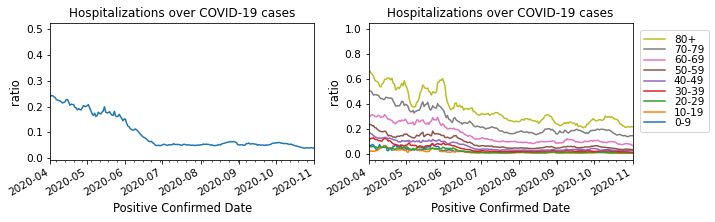

In [20]:
plt.rcParams['figure.figsize'] = [9, 3.2]
fig, ax = plt.subplots(1,2)

newdf = florida
df = get_groupby_rolling_df(newdf, grpvar, freq, 'Hospitalized', time)
df2 = df.copy()
df2['Hospitalized'] = df2['rolling sum']
df = get_groupby_rolling_df(newdf, grpvar, freq, 'all', time)
df['all'] = df['rolling sum']
df = df[[grpvar, 'all']].merge(df2[[grpvar, 'Hospitalized']], on=[time, grpvar], how='outer')
df['Hosp_all'] = df['Hospitalized']/df['all']
df = remove_unkown(df, grpvar)
p = df.groupby(grpvar)['Hosp_all'].plot( legend=False, ax=ax[1])#.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

graph_leg(p, 'Hospitalizations over COVID-19 cases')
handles, labels = ax[1].get_legend_handles_labels()
fig.legend(reversed(handles), reversed(labels),labelspacing=0.04 ,bbox_to_anchor = (1.1,0.85),borderaxespad=0.)


ax[1].set_ylabel('ratio')
ax[1].set_xlabel('CDC Report Date')
##############

newdf = florida
df = get_rolling_df(newdf, time, freq=7, var='Hospitalized')
df2 = df.copy()
df = get_rolling_df(newdf, time, freq=7, var='all')

df = df[['all']].merge(df2[['Hospitalized']], on=[time], how='outer')
df['Hosp_all'] = df['Hospitalized']/df['all']
p = df['Hosp_all'].plot( legend=False, ax=ax[0])#.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
graph_leg_acc(p, 'Hospitalizations over COVID-19 cases')


ax[0].set_ylabel('ratio')
ax[0].set_xlabel('CDC Report Date')

for i in range(2):
    date_fmt = '20%y-%m'
    formatter = dates.DateFormatter(date_fmt)
    ax[i].xaxis.set_major_locator(mdates.MonthLocator())
    ax[i].xaxis.set_major_formatter(formatter)
    plt.gcf().autofmt_xdate()
    ax[i].set_xlabel( 'Positive Confirmed Date')
plt.tight_layout()
fig.savefig('img/{}.svg'.format('hosp_over_covid'), bbox_inches='tight')


# Bar plots for age ratios

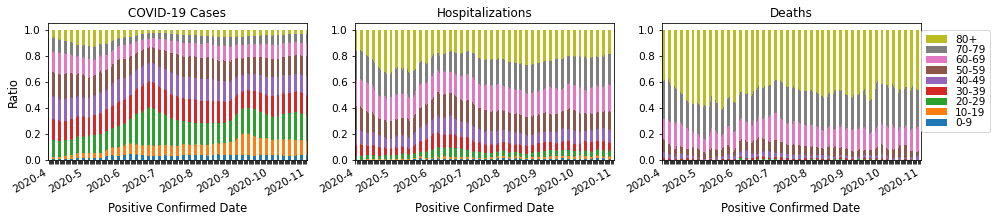

In [18]:
plt.rcParams['figure.figsize'] = [13, 3.2]
fig, ax = plt.subplots(1,3)
vrs = ['all', 'Hospitalized', 'Died'] # 'Died'
lbs = ['COVID-19 Cases','Hospitalizations', 'Deaths']

for i, v in enumerate(vrs):
    get_bar_chart(v, florida[florida['Age_group'] != '_Unknown'].copy(), time, '{}'.format(lbs[i]), ax[i], i)
    ax[i].set_xlabel( 'Positive Confirmed Date')

handles, labels = ax[2].get_legend_handles_labels()
plt.tight_layout()
fig.legend(reversed(handles), reversed(labels), labelspacing=0.04 ,bbox_to_anchor = (1.062,0.85), borderaxespad=0.)
fig.savefig('img/{}.svg'.format('age_ratios'), bbox_inches='tight')  


# Female ratio

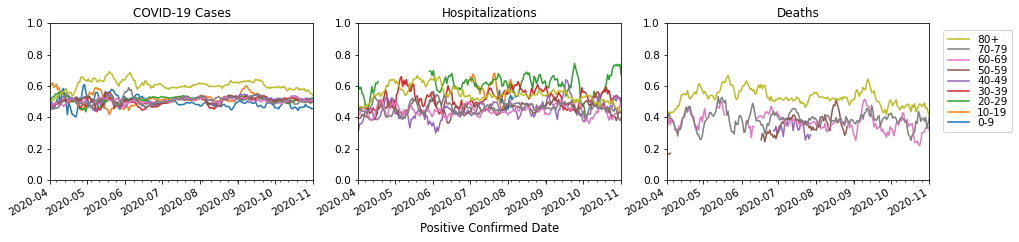

In [19]:
plt.rcParams['figure.figsize'] = [13, 3.2]

vrs = ['all', 'Hospitalized', 'Died'] # 'Died'
lbs = ['COVID-19 Cases', 'Hospitalizations','Deaths']
sv = ['all', 'hosp', 'death']

fig, ax = plt.subplots(1, 3)
plt.cla()

for i, v in enumerate(vrs):
    new_var = "f_{}".format(v)
    newdf[new_var] = 0
    newdf.loc[(newdf['Gender'] == 'Female') & (newdf[v] == 1), new_var] = 1
    df = get_groupby_rolling_df(newdf, grpvar, freq, new_var, time)
    df[new_var] = df['rolling sum']
    df_org = get_groupby_rolling_df(newdf, grpvar, freq, v, time)
    df[v] = df_org['rolling sum']
    df['female_prop'] = df[new_var] / df[v]
    cats = df[grpvar].cat.categories
    everylevel = pd.DataFrame(list(product(df.index.unique(), df[grpvar].cat.categories)), columns=[time, grpvar])
    df = df[df[v] >=5]
    df = df.merge(everylevel, on=[time, grpvar], how='outer')
    df.sort_values(by=time,inplace=True)
    df.index = df[time]
    df[grpvar] = df[grpvar].astype('category')
    df[grpvar].cat.reorder_categories(cats, inplace=True)
    df = remove_unkown(df, grpvar)
    p = df.groupby(grpvar)['female_prop'].plot(ax=ax[i], legend=False)

    graph_leg(p, '{}'.format(lbs[i]))
    ax[i].set_title("{}".format(lbs[i]))
    ax[i].set_xlabel("")
    ax[i].set_ylim(0,1)
    handles, labels = ax[2].get_legend_handles_labels()
    fig.legend(reversed(handles), reversed(labels), labelspacing=0.04 ,bbox_to_anchor = (1.065,0.85), borderaxespad=0.)
    plt.tight_layout()
ax[1].set_xlabel('Positive Confirmed Date')
for i in range(3):
    date_fmt = '20%y-%m'
    formatter = dates.DateFormatter(date_fmt)
    ax[i].xaxis.set_major_locator(mdates.MonthLocator())
    ax[i].xaxis.set_major_formatter(formatter)
    plt.gcf().autofmt_xdate()
fig.savefig('img/{}'.format('gender_age_female.svg'.format(sv[i])), bbox_inches='tight')  
